# Learning TF 

This notebook is some beginner operations with Google's TensorFlow 

The following creates a multiplyer.

In [12]:
import tensorflow as tf

a = tf.placeholder('float') # these are called symbolic variables 
b = tf.placeholder('float')
c = tf.placeholder('float')

y = tf.multiply(a, b) 

with tf.Session() as sess: 
    print('4*3={0}'.format(sess.run(y, feed_dict={a: 4, b: 3})))

4*3=12.0


All the arithmetic operations can be seen at: https://www.tensorflow.org/api_docs/python/math_ops/arithmetic_operators#multiply

Next we'll try a linear regression 

In [146]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Xinit = np.array(np.linspace(-1, 1, 101))
Yinit = np.array(2 * Xinit + np.random.randn(*Xinit.shape))

Optimization Finished!
W = 1.66469848156, b = -0.0778432413936


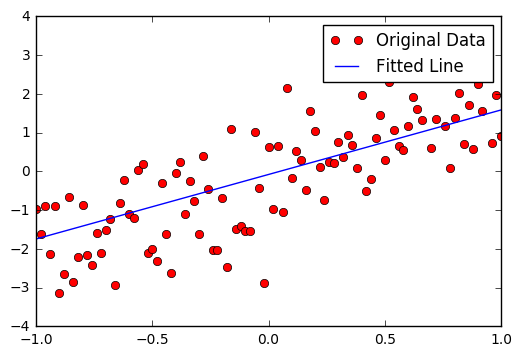

In [147]:
X = tf.placeholder('float') # symbolic variable placeholder 
Y = tf.placeholder('float')

# Set model weights
rng = np.random
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

y_model = tf.add(tf.multiply(X, W), b)

cost = tf.reduce_sum(tf.pow(y_model-Y, 2))/(2*n_samples)

# with everything initiazed its time to train 

# Parameters
learning_rate = 0.01
training_epochs = 1000

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) # GradDescent as optimizer, 

# Launch the graph
with tf.Session() as sess:
    tf.global_variables_initializer().run()

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(Xinit, Yinit):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
    print "Optimization Finished!"    
    print "W = {0}, b = {1}".format(sess.run(W), sess.run(b))
    plt.plot(Xinit, Yinit, 'ro', label='Original Data')
    plt.plot(Xinit, sess.run(W) * Xinit + sess.run(b), label='Fitted Line')
    plt.legend()
    plt.show()

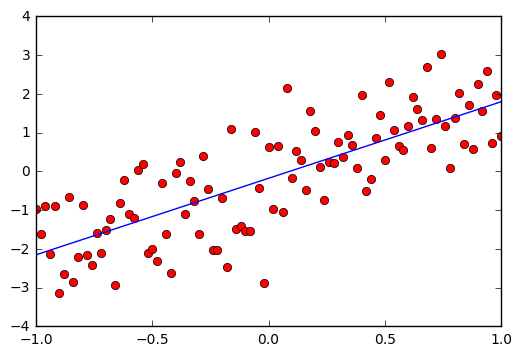

In [159]:
# Lets compare this to the sklearn linear model 
from sklearn.cross_validation import cross_val_predict
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

Xreshape = Xinit.reshape(len(Xinit), 1)
model = lr.fit(Xreshape, Yinit)

plt.plot(Xinit, Yinit, 'ro', label='Original Data')
plt.plot(Xinit, model.predict(Xreshape))


Extremely similar lines. However sklearn implementation took 1-2 seconds where
the tensorflow took ~ 15

Optimization Finished!
W = 1.89480507374, b = -0.175008296967


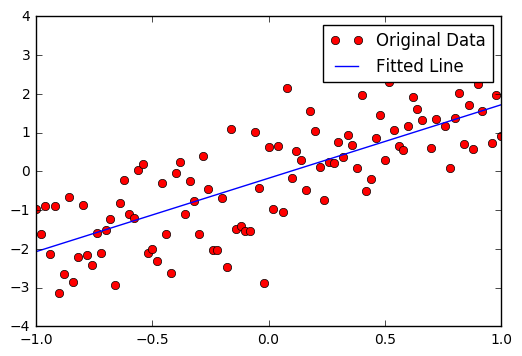

In [160]:
# Parameters
learning_rate = 0.01
training_epochs = 3000

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) # GradDescent as optimizer, 

# Launch the graph
with tf.Session() as sess:
    tf.global_variables_initializer().run()

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(Xinit, Yinit):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
    print "Optimization Finished!"    
    print "W = {0}, b = {1}".format(sess.run(W), sess.run(b))
    plt.plot(Xinit, Yinit, 'ro', label='Original Data')
    plt.plot(Xinit, sess.run(W) * Xinit + sess.run(b), label='Fitted Line')
    plt.legend()
    plt.show()

However more training epochs brings us closer to the sklearn soln. however takes around a minute. Perhaps this is because of my implementation.

What if we normalize the datafirst? 

Optimization Finished!
W = 0.858456850052, b = 0.074843943119


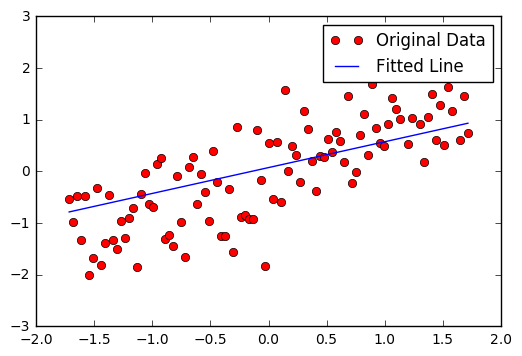

In [161]:
def normalize(array):
    return (array - array.mean()) / array.std()
 
Xnorm = normalize(Xinit)
Ynorm = normalize(Yinit)


# Parameters
learning_rate = 0.01
training_epochs = 1000

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) # GradDescent as optimizer, 

# Launch the graph
with tf.Session() as sess:
    tf.global_variables_initializer().run()

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(Xnorm, Ynorm):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
    print "Optimization Finished!"    
    print "W = {0}, b = {1}".format(sess.run(W), sess.run(b))
    plt.plot(Xnorm, Ynorm, 'ro', label='Original Data')
    plt.plot(Xnorm, sess.run(W) * Xinit + sess.run(b), label='Fitted Line')
    plt.legend()
    plt.show()

On the same amount of epochs as originally it actually performs worse after normalizing... 

Optimization Finished!
W = 0.780546545982, b = 0.00135801522993


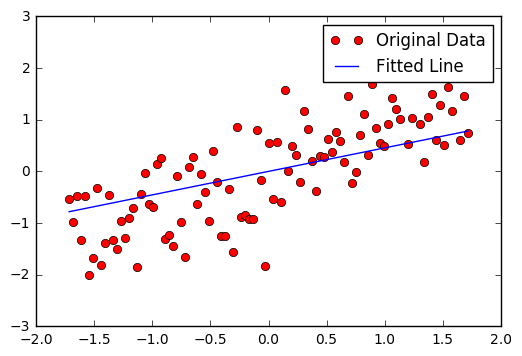

In [162]:
# Parameters
learning_rate = 0.01
training_epochs = 3000

# Launch the graph
with tf.Session() as sess:
    tf.global_variables_initializer().run()

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(Xnorm, Ynorm):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
    print "Optimization Finished!"    
    print "W = {0}, b = {1}".format(sess.run(W), sess.run(b))
    plt.plot(Xnorm, Ynorm, 'ro', label='Original Data')
    plt.plot(Xnorm, sess.run(W) * Xinit + sess.run(b), label='Fitted Line')
    plt.legend()
    plt.show()

Even with more epochs we see that the line doesn't seem to fit well, at least at what the eye would consider a good fit. 